# **AI TECH INSTITUTE** · *Intermediate AI & Data Science*
### Week 05 · Notebook 01 – Causal Inference Fundamentals
**Instructor:** Amir Charkhi  |  **Goal:** Master the foundations of causal reasoning for data-driven decisions.

> Format: short theory → quick practice → build understanding → mini-challenges.


---
## Learning Objectives
- Distinguish between correlation and causation
- Identify and handle confounding variables
- Apply Simpson's Paradox to real scenarios
- Implement basic causal inference techniques
- Build intuition for causal reasoning in AI

## 1. What is Causal Inference?
Causal inference is the science of **determining whether one event causes another**, not just whether they occur together.

In [2]:
# Essential libraries for causal analysis
import numpy as np              # Numerical operations
import pandas as pd             # Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns          # Statistical plots
from scipy import stats        # Statistical tests

# Set style for nice plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8, 4)
%matplotlib inline

In [2]:
# Real-world example: Ice cream sales and crime rates
np.random.seed(42)
days = 30

# Generate temperature data
temperature = np.random.normal(25, 8, days)

print("🌡️ Summer Temperature & City Data:")
print(f"Average temperature: {np.mean(temperature):.1f}°C")
print(f"Temperature range: {min(temperature):.1f} - {max(temperature):.1f}°C")

🌡️ Summer Temperature & City Data:
Average temperature: 23.5°C
Temperature range: 9.7 - 37.6°C


## 2. The Correlation Trap

### 2.1 Spurious Correlations
**What looks related** may not be causally connected - third factors often create illusions.

In [3]:
# Ice cream sales increase with temperature
ice_cream = 50 + 3 * temperature + np.random.normal(0, 10, days)

# Crime also increases with temperature (heat effect)
crime = 20 + 1.5 * temperature + np.random.normal(0, 5, days)

print("📊 Correlation Analysis:")
print(f"Ice cream ↔ Crime correlation: {np.corrcoef(ice_cream, crime)[0,1]:.3f}")
print("Strong correlation! But does ice cream cause crime?")

📊 Correlation Analysis:
Ice cream ↔ Crime correlation: 0.845
Strong correlation! But does ice cream cause crime?


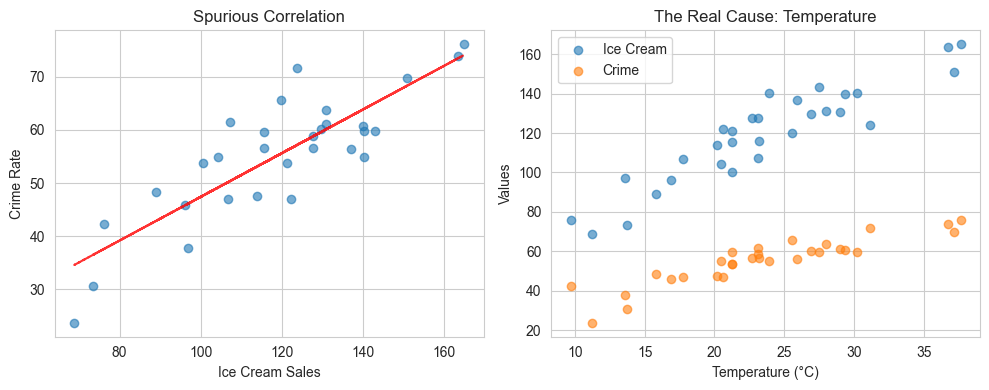

In [4]:
# Visualize the spurious relationship
plt.figure(figsize=(10, 4))

# Plot 1: Ice cream vs Crime
plt.subplot(1, 2, 1)
plt.scatter(ice_cream, crime, alpha=0.6)
plt.xlabel('Ice Cream Sales')
plt.ylabel('Crime Rate')
plt.title('Spurious Correlation')
z = np.polyfit(ice_cream, crime, 1)
p = np.poly1d(z)
plt.plot(ice_cream, p(ice_cream), "r--", alpha=0.8)

# Plot 2: The true cause
plt.subplot(1, 2, 2)
plt.scatter(temperature, ice_cream, alpha=0.6, label='Ice Cream')
plt.scatter(temperature, crime, alpha=0.6, label='Crime')
plt.xlabel('Temperature (°C)')
plt.ylabel('Values')
plt.title('The Real Cause: Temperature')
plt.legend()

plt.tight_layout()
plt.show()

### 2.2 Understanding Confounders
**Confounders** are variables that influence both your suspected cause AND the outcome.

In [3]:
# Confounder example: Education level
n_people = 100
education_years = np.random.uniform(8, 20, n_people)

# Education affects both income and health
income = 20000 + 3000 * education_years + np.random.normal(0, 5000, n_people)
health_score = 40 + 2 * education_years + np.random.normal(0, 5, n_people)

print("🎓 Education as a Confounder:")
print(f"Income ↔ Health correlation: {np.corrcoef(income, health_score)[0,1]:.3f}")
print("But income doesn't directly cause health here!")

🎓 Education as a Confounder:
Income ↔ Health correlation: 0.751
But income doesn't directly cause health here!


**Exercise 1 – Identify the Confounder (easy)**  
Find the hidden confounder in each scenario:


In [ ]:
# Your turn
scenarios = [
    "Coffee drinkers have more heart disease (hint: age)",
    "Countries with more TVs have longer life expectancy (hint: wealth)", 
    "Shoe size correlates with reading ability in children (hint: ?)",
    "Hospital stays correlate with death rates (hint: ?)"
]

# Identify the confounder for scenarios 3 and 4
# 3: "Age - older children have bigger feet AND read better"
# 4: "Illness severity - sicker people stay longer AND die more often"


<details>
<summary><b>Solution</b></summary>

```python
confounders = [
    "Age - older people drink more coffee AND have more heart disease",
    "Wealth - richer countries have more TVs AND better healthcare",
    "Age - older children have bigger feet AND read better",
    "Illness severity - sicker people stay longer AND die more often"
]

for i, (scenario, confounder) in enumerate(zip(scenarios, confounders)):
    print(f"{i+1}. {scenario}")
    print(f"   → Confounder: {confounder}\n")
```
</details>

## 3. Simpson's Paradox

### 3.1 When Aggregated Data Lies
Simpson's Paradox: A trend that appears in groups of data **reverses** when groups are combined.

In [ ]:
# University admissions example
# Department A: Easy, more men apply
dept_a_men = {'applied': 450, 'admitted': 270}  # 60% admission
dept_a_women = {'applied': 50, 'admitted': 40}  # 80% admission

# Department B: Hard, more women apply  
dept_b_men = {'applied': 50, 'admitted': 15}    # 30% admission
dept_b_women = {'applied': 450, 'admitted': 158} # 35% admission

print("🎓 Admissions by Department:")
print(f"Dept A - Men: {270/450:.1%}, Women: {40/50:.1%}")
print(f"Dept B - Men: {15/50:.1%}, Women: {158/450:.1%}")
print("Women have higher rates in BOTH departments!")

In [ ]:
# But look at overall rates!
total_men_applied = 450 + 50
total_men_admitted = 270 + 15
total_women_applied = 50 + 450
total_women_admitted = 40 + 158

print("\n📊 Overall Admission Rates:")
print(f"Men overall: {total_men_admitted/total_men_applied:.1%}")
print(f"Women overall: {total_women_admitted/total_women_applied:.1%}")
print("⚠️ PARADOX: Men have higher overall rate despite lower rates in each dept!")

In [ ]:
# Visualize Simpson's Paradox
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Department-specific rates
departments = ['Dept A\nMen', 'Dept A\nWomen', 'Dept B\nMen', 'Dept B\nWomen']
rates = [60, 80, 30, 35]
colors = ['lightblue', 'pink', 'lightblue', 'pink']

ax1.bar(departments, rates, color=colors)
ax1.set_ylabel('Admission Rate (%)')
ax1.set_title('By Department: Women Win Both')
ax1.set_ylim(0, 100)

# Overall rates
overall_labels = ['Men Overall', 'Women Overall']
overall_rates = [total_men_admitted/total_men_applied * 100,
                total_women_admitted/total_women_applied * 100]
overall_colors = ['lightblue', 'pink']

ax2.bar(overall_labels, overall_rates, color=overall_colors)
ax2.set_ylabel('Admission Rate (%)')
ax2.set_title('Overall: Men Win (Paradox!)')
ax2.set_ylim(0, 100)

plt.tight_layout()
plt.show()

### 3.2 Why Simpson's Paradox Matters
This paradox appears in:
- Medical trials (treatment effectiveness)
- Hiring decisions (discrimination analysis)  
- ML model performance (across subgroups)
- A/B testing (segment analysis)

**Exercise 2 – Detect Simpson's Paradox (medium)**  
Analyze treatment effectiveness data for a paradox:


In [ ]:
# Your turn
# Treatment outcomes by age group
young_treatment = {'patients': 100, 'recovered': 85}  # 85% recovery
young_control = {'patients': 300, 'recovered': 240}   # 80% recovery

old_treatment = {'patients': 300, 'recovered': 180}   # 60% recovery  
old_control = {'patients': 100, 'recovered': 55}      # 55% recovery

# Calculate and compare rates
# Does treatment work in each group?
# Does treatment work overall?

total_treatment_patients = 100 + 300  
total_treatment_recovered = 85 + 180
total_control_patients = 300 + 100
total_control_recovered = 240 + 55

print(f"Treatment overall: {total_treatment_recovered/total_treatment_patients:.1%}")
print(f"Control overall: {total_control_recovered/total_control_patients:.1%}")
print("⚠️ PARADOX: Control beats treatment overall!")



<details>
<summary><b>Solution</b></summary>

```python
print("💊 Treatment Effectiveness Analysis:")
print("\nBy Age Group:")
print(f"Young - Treatment: {85/100:.1%}, Control: {240/300:.1%}")
print(f"Old - Treatment: {180/300:.1%}, Control: {55/100:.1%}")
print("✅ Treatment beats control in BOTH age groups!")

# Calculate overall rates
total_treatment_patients = 100 + 300  
total_treatment_recovered = 85 + 180
total_control_patients = 300 + 100
total_control_recovered = 240 + 55

print("\nOverall Rates:")
print(f"Treatment overall: {total_treatment_recovered/total_treatment_patients:.1%}")
print(f"Control overall: {total_control_recovered/total_control_patients:.1%}")
print("⚠️ PARADOX: Control beats treatment overall!")

print("\n📝 Explanation:")
print("More old patients got treatment (harder cases)")
print("More young patients got control (easier cases)")
print("This allocation created the paradox!")
```
</details>

## 4. Basic Causal Inference Methods

### 4.1 Controlling for Confounders
Remove the influence of confounding variables to isolate causal effects.

In [ ]:
# Generate data with confounding
n_customers = 200
age = np.random.uniform(20, 60, n_customers)

# Age affects both premium membership and spending
premium_prob = 1 / (1 + np.exp(-(age - 40) / 10))  # Older → premium
is_premium = np.random.binomial(1, premium_prob)

# Spending depends on age AND premium status
spending = 100 + 2*age + 50*is_premium + np.random.normal(0, 20, n_customers)

print("💰 Customer Spending Analysis:")
print(f"Premium customers spend: ${spending[is_premium==1].mean():.2f}")
print(f"Regular customers spend: ${spending[is_premium==0].mean():.2f}")
print(f"Naive difference: ${spending[is_premium==1].mean() - spending[is_premium==0].mean():.2f}")

In [ ]:
# Control for age using stratification
age_groups = pd.cut(age, bins=3, labels=['Young', 'Middle', 'Old'])

print("\n📊 Controlled Analysis (by age group):")
controlled_effects = []

for group in ['Young', 'Middle', 'Old']:
    mask = age_groups == group
    premium_spend = spending[mask & (is_premium==1)].mean()
    regular_spend = spending[mask & (is_premium==0)].mean()
    effect = premium_spend - regular_spend
    
    if not np.isnan(effect):
        controlled_effects.append(effect)
        print(f"{group}: Premium effect = ${effect:.2f}")

print(f"\nTrue causal effect (controlled): ${np.mean(controlled_effects):.2f}")
print("(Should be close to $50 - our true effect)")

### 4.2 Matching Methods
Find similar units in treatment and control groups for fair comparison.

In [ ]:
# Simple matching example
from sklearn.preprocessing import StandardScaler

# Create feature matrix for matching
X = np.column_stack([age])
X_scaled = StandardScaler().fit_transform(X)

# For each premium customer, find closest regular customer
matched_pairs = []
premium_indices = np.where(is_premium == 1)[0]
regular_indices = np.where(is_premium == 0)[0]

for p_idx in premium_indices[:20]:  # Match first 20
    # Find closest regular customer by age
    distances = np.abs(age[p_idx] - age[regular_indices])
    closest_idx = regular_indices[np.argmin(distances)]
    
    matched_pairs.append({
        'premium_spend': spending[p_idx],
        'regular_spend': spending[closest_idx],
        'age_diff': abs(age[p_idx] - age[closest_idx])
    })

In [ ]:
# Analyze matched pairs
matched_df = pd.DataFrame(matched_pairs)
matched_effect = matched_df['premium_spend'].mean() - matched_df['regular_spend'].mean()

print("👥 Matched Pairs Analysis:")
print(f"Average age difference in pairs: {matched_df['age_diff'].mean():.1f} years")
print(f"Matched estimate of premium effect: ${matched_effect:.2f}")
print(f"True effect: $50")

**Exercise 3 – Causal Analysis (hard)**  
Determine if training actually improves employee performance:


In [ ]:
# Your turn
# Employee performance data
np.random.seed(42)
n_employees = 150

# Prior performance affects training selection
prior_performance = np.random.uniform(40, 90, n_employees)
training_prob = (prior_performance - 40) / 100  # Better employees more likely to get training
got_training = np.random.binomial(1, training_prob)

# New performance: prior + training effect + noise
true_training_effect = 10
new_performance = prior_performance + true_training_effect * got_training + np.random.normal(0, 5, n_employees)

# Naive analysis (wrong!)
# Your code here...

# Controlled analysis (correct!)
# Your code here...


<details>
<summary><b>Solution</b></summary>

```python
print("📈 Employee Training Analysis:")

# Naive analysis (biased)
trained_perf = new_performance[got_training==1].mean()
untrained_perf = new_performance[got_training==0].mean()
naive_effect = trained_perf - untrained_perf

print(f"\n❌ Naive Analysis:")
print(f"Trained employees: {trained_perf:.1f}")
print(f"Untrained employees: {untrained_perf:.1f}")
print(f"Naive effect: {naive_effect:.1f}")
print("(Overestimated because better employees got training!)")

# Control for prior performance
performance_groups = pd.cut(prior_performance, bins=4, 
                           labels=['Low', 'Medium', 'High', 'Very High'])

print(f"\n✅ Controlled Analysis:")
controlled_effects = []

for group in ['Low', 'Medium', 'High', 'Very High']:
    mask = performance_groups == group
    if sum(mask & (got_training==1)) > 0 and sum(mask & (got_training==0)) > 0:
        trained = new_performance[mask & (got_training==1)].mean()
        untrained = new_performance[mask & (got_training==0)].mean()
        effect = trained - untrained
        controlled_effects.append(effect)
        print(f"{group} performers: Training effect = {effect:.1f}")

print(f"\nControlled estimate: {np.mean(controlled_effects):.1f}")
print(f"True effect: {true_training_effect}")

# Visualization
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(prior_performance[got_training==0], new_performance[got_training==0], 
           alpha=0.5, label='No Training')
plt.scatter(prior_performance[got_training==1], new_performance[got_training==1], 
           alpha=0.5, label='Training')
plt.xlabel('Prior Performance')
plt.ylabel('New Performance')
plt.title('Performance Change')
plt.legend()

plt.subplot(1, 2, 2)
methods = ['Naive\n(Biased)', 'Controlled\n(Correct)', 'True\nEffect']
effects = [naive_effect, np.mean(controlled_effects), true_training_effect]
colors = ['red', 'green', 'blue']
plt.bar(methods, effects, color=colors, alpha=0.7)
plt.ylabel('Estimated Training Effect')
plt.title('Method Comparison')
plt.axhline(y=true_training_effect, color='blue', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
```
</details>

## 5. When Causation Matters in AI

### 5.1 Real AI Applications
Causal inference is crucial for:

In [ ]:
applications = {
    "Recommendation Systems": "Did recommendation cause purchase or would user buy anyway?",
    "Medical AI": "Will treatment help this specific patient?",
    "Hiring Algorithms": "Does degree cause performance or just correlate?",
    "Marketing Attribution": "Which ad actually drove the conversion?",
    "Policy Decisions": "Will this intervention reduce churn?"
}

for app, question in applications.items():
    print(f"🤖 {app}:")
    print(f"   {question}\n")

### 5.2 Building Causal Intuition

In [ ]:
# Interactive example: Marketing campaign
np.random.seed(42)
n_customers = 1000

# Customer features
customer_value = np.random.exponential(100, n_customers)
engagement = np.random.uniform(0, 1, n_customers)

# Campaign targeting (biased toward high-value customers)
campaign_prob = customer_value / (customer_value + 100)
got_campaign = np.random.binomial(1, campaign_prob)

# Purchase outcome
base_purchase_prob = 0.1 + 0.3 * (engagement > 0.5)
campaign_effect = 0.1  # True effect

purchase_prob = base_purchase_prob + campaign_effect * got_campaign
purchased = np.random.binomial(1, purchase_prob)

print("📧 Email Campaign Analysis:")
print(f"Campaign group purchase rate: {purchased[got_campaign==1].mean():.1%}")
print(f"No campaign purchase rate: {purchased[got_campaign==0].mean():.1%}")
print("But is the difference causal? Let's check!")

In [ ]:
# Proper causal analysis
# Create value groups
value_groups = pd.qcut(customer_value, q=4, labels=['Low', 'Medium', 'High', 'Very High'])

effects = []
for group in ['Low', 'Medium', 'High', 'Very High']:
    mask = value_groups == group
    campaign_rate = purchased[mask & (got_campaign==1)].mean()
    no_campaign_rate = purchased[mask & (got_campaign==0)].mean()
    
    if not (np.isnan(campaign_rate) or np.isnan(no_campaign_rate)):
        effect = campaign_rate - no_campaign_rate
        effects.append(effect)
        print(f"{group} value customers: {effect:.1%} lift")

print(f"\nTrue causal effect: {np.mean(effects):.1%} (should be ~10%)")

## 6. Mini-Challenges
- **M1 (easy):** Identify three real-world examples of correlation without causation
- **M2 (medium):** Create a dataset exhibiting Simpson's Paradox with 3 groups
- **M3 (hard):** Implement propensity score matching for causal inference

In [ ]:
# Your turn - try the challenges!
# M1: List your examples

# M2: Create paradox data
# Hint: Make success rates that reverse when aggregated

# M3: Advanced matching
# Hint: Use logistic regression for propensity scores


<details>
<summary><b>Solutions</b></summary>

```python
# M1 - Correlation without causation examples
print("🔍 Correlation ≠ Causation Examples:")
examples = [
    "Ice cream sales ↔ Drowning deaths (Confounder: Summer/heat)",
    "Number of firefighters ↔ Fire damage (Confounder: Fire size)",
    "Hospital quality ↔ Death rates (Confounder: Patient severity)",
    "Organic food sales ↔ Autism diagnoses (Confounder: Time/awareness)",
    "Nicolas Cage movies ↔ Pool drownings (Pure coincidence!)"
]

for i, ex in enumerate(examples[:3], 1):
    print(f"{i}. {ex}")

# M2 - Create Simpson's Paradox
print("\n🎭 Simpson's Paradox Dataset:")

# Three departments with different standards
dept_x = {'male_admit': 20, 'male_total': 100,   # 20% rate
         'female_admit': 18, 'female_total': 60}  # 30% rate

dept_y = {'male_admit': 30, 'male_total': 60,    # 50% rate
         'female_admit': 70, 'female_total': 100} # 70% rate

dept_z = {'male_admit': 6, 'male_total': 40,     # 15% rate
         'female_admit': 12, 'female_total': 40}  # 30% rate

# Check each department
for dept_name, dept in [('X', dept_x), ('Y', dept_y), ('Z', dept_z)]:
    m_rate = dept['male_admit'] / dept['male_total']
    f_rate = dept['female_admit'] / dept['female_total']
    print(f"Dept {dept_name}: M={m_rate:.1%}, F={f_rate:.1%} (F wins)")

# Check overall
total_m_admit = 20 + 30 + 6
total_m_total = 100 + 60 + 40
total_f_admit = 18 + 70 + 12
total_f_total = 60 + 100 + 40

print(f"\nOverall: M={total_m_admit/total_m_total:.1%}, "
      f"F={total_f_admit/total_f_total:.1%} (Same!)")

# M3 - Propensity Score Matching
print("\n🎯 Propensity Score Matching:")

from sklearn.linear_model import LogisticRegression

# Generate data
n = 500
X1 = np.random.normal(50, 10, n)
X2 = np.random.normal(30, 5, n)

# Treatment assignment (biased)
treat_prob = 1 / (1 + np.exp(-(-2 + 0.05*X1 + 0.1*X2)))
treatment = np.random.binomial(1, treat_prob)

# Outcome with treatment effect = 5
outcome = 20 + 0.5*X1 + 0.3*X2 + 5*treatment + np.random.normal(0, 3, n)

# Calculate propensity scores
X = np.column_stack([X1, X2])
ps_model = LogisticRegression()
ps_model.fit(X, treatment)
propensity = ps_model.predict_proba(X)[:, 1]

# Match on propensity scores
treated_idx = np.where(treatment == 1)[0]
control_idx = np.where(treatment == 0)[0]

matched_effects = []
for t_idx in treated_idx[:50]:  # Match 50 treated units
    # Find closest control unit by propensity score
    ps_distances = np.abs(propensity[t_idx] - propensity[control_idx])
    closest = control_idx[np.argmin(ps_distances)]
    
    effect = outcome[t_idx] - outcome[closest]
    matched_effects.append(effect)

print(f"Propensity-matched effect: {np.mean(matched_effects):.2f}")
print(f"True effect: 5.0")
```
</details>

## Wrap-Up & Next Steps
✅ You understand the difference between correlation and causation  
✅ You can identify and control for confounding variables  
✅ You recognize Simpson's Paradox in data  
✅ You can apply basic matching methods for causal inference  
✅ You have intuition for when causal analysis matters in AI  

**Next:** Practical Causal Analysis - Apply these concepts to real business problems!
